---
**Minimización del tiempo.** Un barco encalló en el punto **P** a $9 km$ del punto más próximo a la costa en línea recta. Se necesita enviar a un mensajero a un pueblo situado en la orilla de la costa a 15 km de **P**. Teniendo en cuenta que el mensajero recorre a pie $5 km/h$, y en una barca a $4 km/h$, decir en qué punto de la orilla debe desembarcar para llegar al pueblo lo más pronto posible?

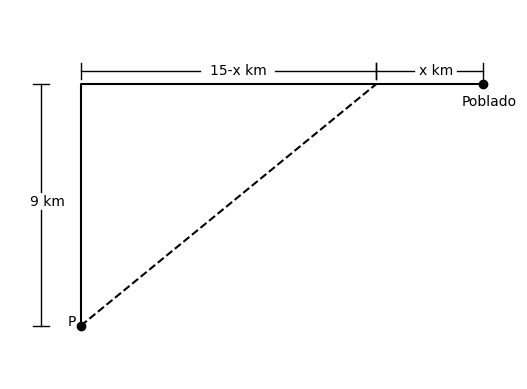

In [1]:
import matplotlib.pyplot as plt
def dim(p1,p2,txt):
    vertical=p1[0]-p2[0]==0
    plt.plot([p1[0]-0.3*vertical,p1[0]+0.3*vertical],[p1[1]-0.3*(1-vertical),p1[1]+0.3*(1-vertical)],'k',
             [p2[0]-0.3*vertical,p2[0]+0.3*vertical],[p2[1]-0.3*(1-vertical),p2[1]+0.3*(1-vertical)],'k',
             [min(p1[0],p2[0]),(p1[0]+p2[0])/2-0.15*len(txt)*(1-vertical)],[min(p1[1],p2[1]),(p1[1]+p2[1])/2-0.2*vertical],'k',
             [max(p1[0],p2[0]),(p1[0]+p2[0])/2+0.25*len(txt)*(1-vertical)],[max(p1[1],p2[1]),(p1[1]+p2[1])/2+0.5*vertical],'k',lw=1)
    plt.text((p1[0]+p2[0])/2-len(txt)*0.1,(p1[1]+p2[1])/2-0.15*(1-vertical),txt)

plt.plot([0,0,15],[0,9,9],'k',
         [0,11],[0,9],'--k',
         [0,15],[0,9],'ok')
plt.text(-0.5,0,'P')
plt.text(14.2,8.2,'Poblado')
dim((-1.5,9),(-1.5,0),'9 km')
dim((0,9.5),(11,9.5),'15-x km')
dim((11,9.5),(15,9.5),'x km')

plt.axis('equal')
ax=plt.axis('off')

vel=Distancia/Tiempo, por lo tanto t=d/v.
Tenemos dos velocidades: a pie 5 kmh
y en barca 4 km/h

**Deducción del criterio de optimización**

Se desea minimizar el tiempo en función de las distancias y velocidades conocidas:
$$ \min_x t=\min_x \frac{d_1}{v_1}+\frac{x}{v_2}, $$
donde $d_1$ es la distancia recorrida en balsa a una velocidad $v_1=4\;\mathrm{km/h}$, además, se sabe que la distancia recorrida a pie fue a velocidad $v_2=5\;\mathrm{km/h}$, sustituyendo la distancia en balsa, a través del teorema de Pitágoras, obrenemos:
$$ \min_x\left(\frac{\sqrt{9^2+(15-x)^2}}{4}+\frac{x}{5}\right),$$
para $0\leq x \leq 15$.

In [2]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x=sym.var('x',real=True,nonnegative=True)
def t(x):
  return ((9**2+(15-x)**2)**0.5/4)+x/5

dt=sym.diff(t(x),x)
c=sym.solve(dt,x)
c

[3.00000000000000]

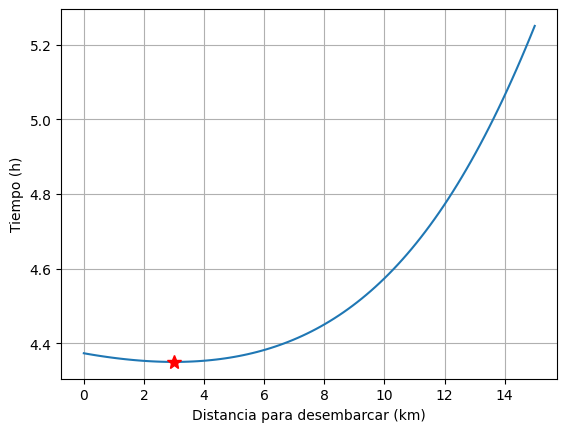

In [5]:
#Grafico para comprobar que sea un mínimo:
x_num=np.linspace(0,15,100)
plt.plot(x_num,t(x_num))
plt.plot(c[0],t(c[0]),'r*',ms=10)
plt.ylabel('Tiempo (h)')
plt.xlabel('Distancia para desembarcar (km)')
plt.grid()

In [7]:
#Ahora sabemos que para un tiempo mínimo tiene que desembarcar a 3 km del poblado,
#pero en cuánto tiempo lo hace?
t(c[0])

4.35000000000000

**Resultado**

Para llegar lo más pronto posible, el mensajero debe desembarcar a $3\;\mathrm{km}$ del poblado, y llegará en $4.35\;\mathrm{h}$.

In [8]:
#Con este método puedo resolver con distintas variables

## NUEVO TEMA:
 # $PROGRAMACIÓN \; LINEAL$